# Comparison with PGOPHER

In this notebook, we run several simulations with different molecules. We compare the resulting line transitions with those obtained with [PGOPHER](http://pgopher.chm.bris.ac.uk/).

In [1]:
from edibles.utils.simulations.RotationalEnergies import WavelengthToWavenumber
from edibles.utils.simulations.RotationalEnergies import Rotational_Energies

import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
from IPython import display
import matplotlib.pyplot as plt

Going Through


In [2]:
def Simulated_Contour(A, Delta_A, B, Delta_B, C, Delta_C, Trot, Jlimit, Target, Q_scale=1,
                      PR_scale=1, Q_Branch=False, lambda0=0, xlim=(-5,5), transition_type='Parallel'):
    """Generate simulated contour.

    Args:
        A (float): Rotational constant of the first rotational axis.
        Delta_A (float): Difference between the values of the first rotational constant of the 
            upper and lower states.
        B (float): Constant of the second axis.
        Delta_B (float): Difference of the second constant.
        C (float): Constant of the third axis.
        Delta_C (float): Difference of the third constant.
        Trot (float): Temperature (Kelvin degrees).
        Jlimit (int): Upper bound of the first rotational quantum number J.
        Target (str): Name of the target sightline.
        Q_scale (float, optional): Scale of the Q-branch. Default to 1.
        PR_scale (float, optional): Scale of the P-branch and R-branch. Default to 1.
        Q_Branch (bool, optional): Wheter to consideror not the Q-branch. Default to False.
        lambda0 (float, optional): Center wavelength of DIB (Angstrom). Default to 0.

    Returns:
        re_low.spectrax (1darray): Resulting spectrum.
        re_low.final_y (1darray): Intensity of spectrum.
    """
    # Generate class object.
    re_low = Rotational_Energies(A=A, B=B, C=C, Target=Target,
                                 Q_scale=Q_scale, PR_scale=PR_scale, transition_type=transition_type)

    # Check for available symmetries.
    if re_low.flag:
        print("Can't deal with this molecule yet")
        return([0], [0])
    else:
        # Get rotational energies.
        re_low.rotational_energies(Jlimit=Jlimit)

        # Get energies populations.
        re_low.boltzmann(T=Trot)

        # Define new class to transitionate.
        re_up = Rotational_Energies(A=A+Delta_A, B=B+Delta_B, C=C+Delta_C,
                                    Target=Target, Q_scale=Q_scale, PR_scale=PR_scale,
                                    transition_type=transition_type)

        # Get rotational energies of new class
        re_up.rotational_energies(Jlimit=Jlimit)

        # Get allowed combinations between the two clases (ie states).
        re_low.allowed_combinations(Jup=re_up.J, Kup=re_up.K,
                                    Eup=re_up.E, Q_Branch=Q_Branch)

        # Get transition frequencies and populations.
        re_low.transition_freq_and_pop()

        # Plot Transitions
        plt.figure("Transitions")
        re_low.plot_transitions()
        plt.xlim(xlim)
        plt.legend()
        
        plt.show()

# Linear molecule 1 without Q-branch

Symmetry Type:  spherical
Symmetry Type:  spherical


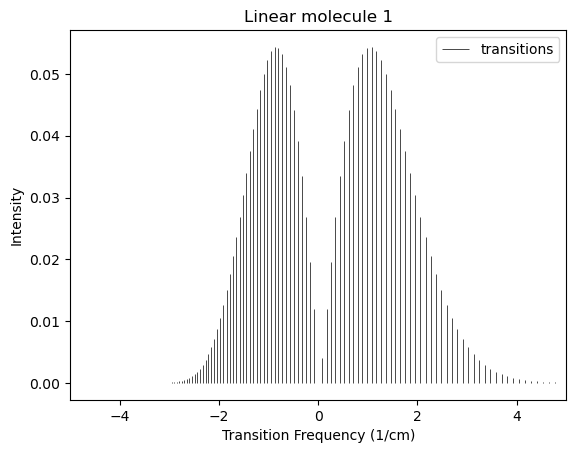

In [3]:
# Perform simulation.
B = 0.042
T = 15
delta = 0.01
Q_Branch = False

sim = Simulated_Contour(A=B, B=B, C=B, Delta_A=B*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=200, Target='Linear molecule 1', lambda0=6614, Q_Branch=Q_Branch, )

With PGOPHER we obtain:

<img src="https://i.imgur.com/PLlQkyB.jpg" alt="Drawing" style="width: 600px;"/>

# Linear Molecule 2 without Q branch

Symmetry Type:  spherical
Symmetry Type:  spherical


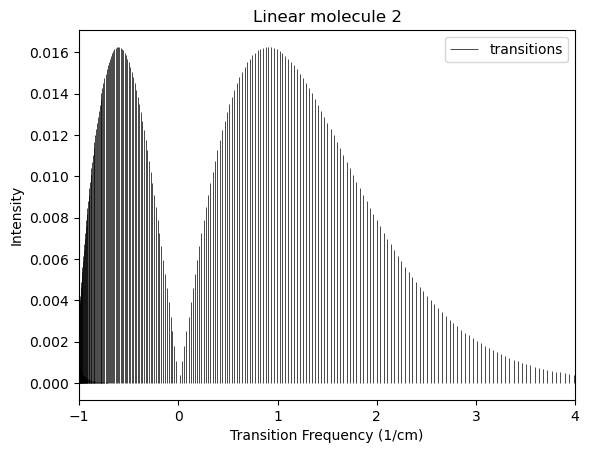

In [4]:
B = 0.01
T = 40
delta = 0.01
Q_branch = False

sim = Simulated_Contour(A=B, B=B, C=B, Delta_A=B*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=200, Target='Linear molecule 2', lambda0=6614, Q_Branch=Q_branch, xlim = (-1, 4))

With PGOPHER we obtain:

<img src="https://i.imgur.com/f1nQkv0.jpg" alt="Drawing" style="width: 600px;"/>

# Linear Molecule 3 with Q-branch

Symmetry Type:  spherical
Symmetry Type:  spherical


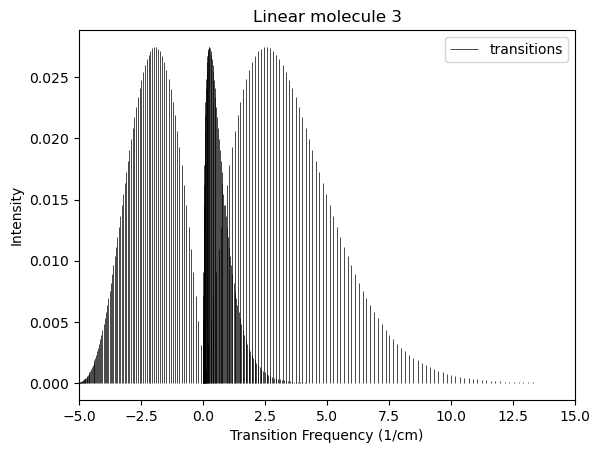

0.0505


In [5]:
B = 0.05
T = 70
delta = 0.01
Q_branch = True

sim = Simulated_Contour(A=B, B=B, C=B, Delta_A=B*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=200, Target='Linear molecule 3', lambda0=6614, Q_Branch=Q_branch, xlim = (-5, 15))

print(B + B*delta)

With PGOPHER we obtain:

<img src="https://i.imgur.com/8MKfej4.jpg" alt="Drawing" style="width: 600px;"/>

# Linear Molecule 4 with Q-branch

Symmetry Type:  spherical
Symmetry Type:  spherical


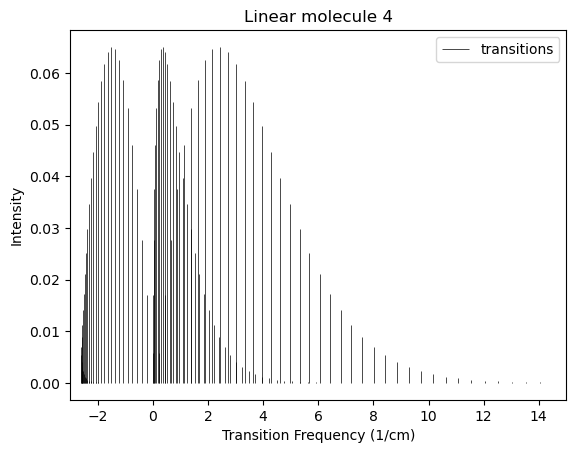

0.10400000000000001


In [6]:
B = 0.1
T = 25
delta = 0.04
Q_branch = True

sim = Simulated_Contour(A=B, B=B, C=B, Delta_A=B*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=200, Target='Linear molecule 4', lambda0=6614, Q_Branch=Q_branch, xlim = (-3, 15))

print(B + B*delta)

With PGOPHER we obtain:

<img src="https://i.imgur.com/NxrGD8o.jpg" alt="Drawing" style="width: 580px;"/>

# Linear molecule 5 without Q-branch and delta = 0

Symmetry Type:  spherical
Symmetry Type:  spherical


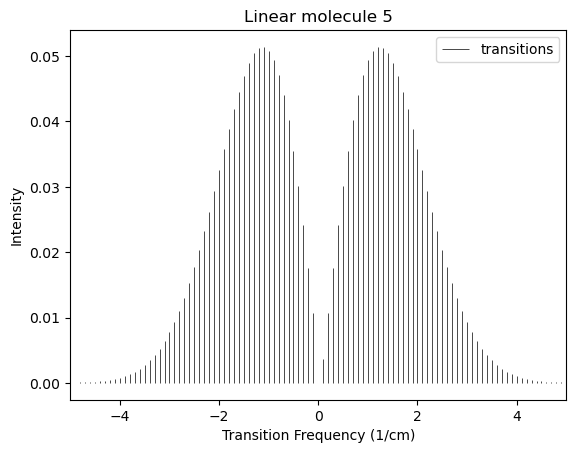

In [7]:
B = 0.05
T = 20
delta = 0.0
Q_branch = False

sim = Simulated_Contour(A=B, B=B, C=B, Delta_A=B*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=200, Target='Linear molecule 5', lambda0=6614, Q_Branch=Q_branch, xlim = (-5, 5))

With PGOPHER we obtain:

<img src="https://i.imgur.com/nyOmX06.jpg" alt="Drawing" style="width: 580px;"/>

# Linear molecule 6 with Q branch and delta = 0 

Symmetry Type:  spherical
Symmetry Type:  spherical


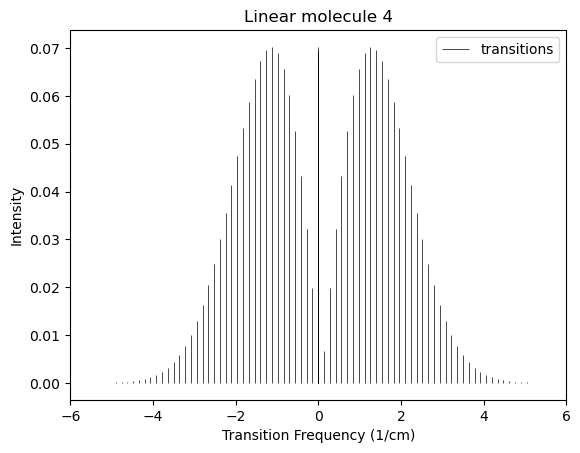

0.07


In [8]:
B = 0.07
T = 15
delta = 0.0
Q_branch = True

sim = Simulated_Contour(A=B, B=B, C=B, Delta_A=B*delta, Delta_B=B*delta, Delta_C=B*delta, Trot=T,
                        Jlimit=200, Target='Linear molecule 4', lambda0=6614, Q_Branch=Q_branch, xlim = (-6, 6))

print(B + B*delta)

With PGOPHER we obtain:

<img src="https://i.imgur.com/svYfUDS.jpg" alt="Drawing" style="width: 580px;"/>

The unique Q-branch line is way more intense, I just cropped it out to see the PR-branches structure

# Prolate molecule 1

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


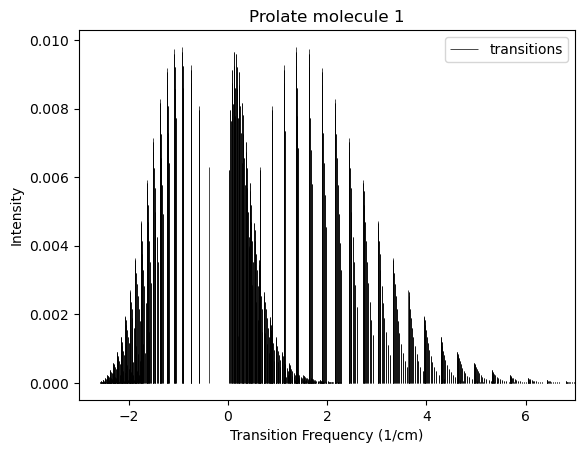

0.10400000000000001
0.20600000000000002


In [9]:
A = 0.2
B = 0.1
T = 10
delta_B = 0.04
delta_A = 0.03
Q_branch = True

sim = Simulated_Contour(A=A, B=B, C=B, Delta_A=A*delta_A, Delta_B=B*delta_B, Delta_C=B*delta_B, Trot=T,
                        Jlimit=50, Target='Prolate molecule 1', lambda0=6614, Q_Branch=Q_branch, xlim = (-3, 7))

print(B + B*delta_B)
print(A + A*delta_A)

With PGOPHER we obtain:

<img src="https://i.imgur.com/sCRtmL9.jpg" alt="Drawing" style="width: 600px;"/>

## Prolate molecule 1 - perpendicular

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


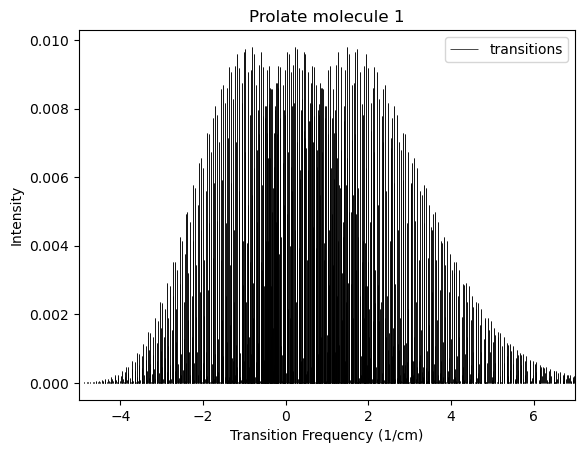

0.10400000000000001
0.20600000000000002


In [10]:
A = 0.2
B = 0.1
T = 10
delta_B = 0.04
delta_A = 0.03
Q_branch = True

sim = Simulated_Contour(A=A, B=B, C=B, Delta_A=A*delta_A, Delta_B=B*delta_B, Delta_C=B*delta_B, Trot=T,
                        Jlimit=50, Target='Prolate molecule 1', lambda0=6614, Q_Branch=Q_branch, xlim = (-5, 7),
                       transition_type = 'Perpendicular')

print(B + B*delta_B)
print(A + A*delta_A)

# Prolate molecule 2

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


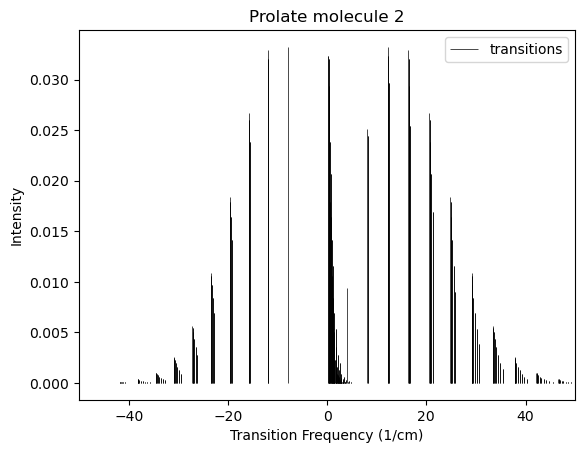

2.02
3.06


In [11]:
A = 3
B = 2
T = 50
delta_B = 0.01
delta_A = 0.02
Q_branch = True

sim = Simulated_Contour(A=A, B=B, C=B, Delta_A=A*delta_A, Delta_B=B*delta_B, Delta_C=B*delta_B, Trot=T,
                        Jlimit=50, Target='Prolate molecule 2', lambda0=6614, Q_Branch=Q_branch, xlim = (-50, 50))

print(B + B*delta_B)
print(A + A*delta_A)

With PGOPHER we obtain:

<img src="https://i.imgur.com/29xx2L1.jpg" alt="Drawing" style="width: 600px;"/>

# Prolate molecule 3 with delta = 0

Symmetry Type:  symmetric_prolate
Symmetry Type:  symmetric_prolate


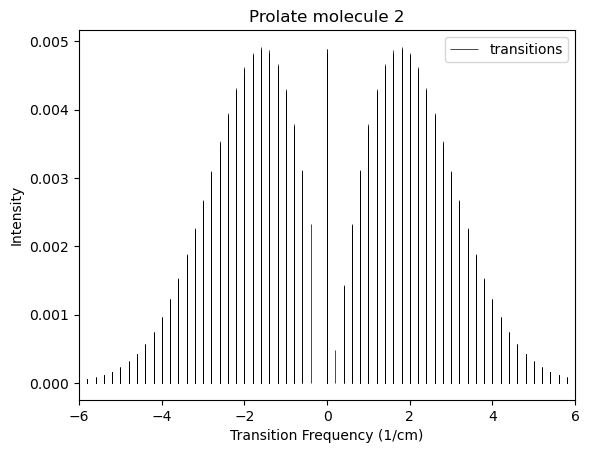

0.1
0.2


In [12]:
A = 0.2
B = 0.1
T = 20
delta_B = 0.0
delta_A = 0.0
Q_branch = True

sim = Simulated_Contour(A=A, B=B, C=B, Delta_A=A*delta_A, Delta_B=B*delta_B, Delta_C=B*delta_B, Trot=T,
                        Jlimit=100, Target='Prolate molecule 2', lambda0=6614, Q_Branch=Q_branch, xlim = (-6, 6))

print(B + B*delta_B)
print(A + A*delta_A)

With PGOPHER we obtain:

<img src="https://i.imgur.com/NIUC6Td.jpg" alt="Drawing" style="width: 600px;"/>

# Oblate molecule 1

Symmetry Type:  symmetric_oblate
Symmetry Type:  symmetric_oblate


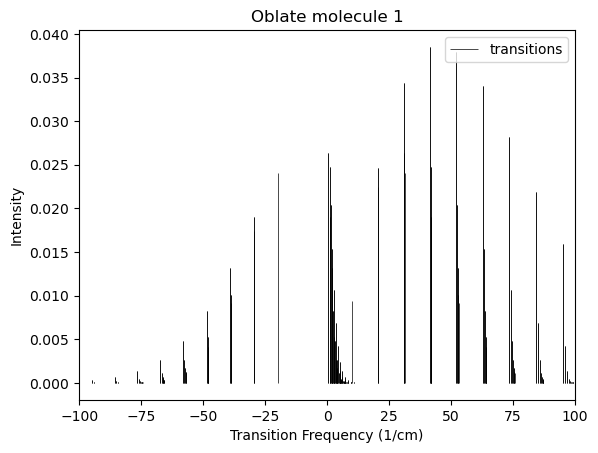

5.1
1.04


In [13]:
C = 1
B = 5
T = 65
delta_B = 0.02
delta_C = 0.04
Q_branch = True

sim = Simulated_Contour(A=B, B=B, C=C, Delta_A=B*delta_B, Delta_B=B*delta_B, Delta_C=C*delta_C, Trot=T,
                        Jlimit=200, Target='Oblate molecule 1', lambda0=6614, Q_Branch=Q_branch, xlim = (-100, 100))

print(B + B*delta_B)
print(C + C*delta_C)

With PGOPHER we obtain:

<img src="https://i.imgur.com/djZwWBV.jpg" alt="Drawing" style="width: 600px;"/>

# Oblate molecule 2

Symmetry Type:  symmetric_oblate
Symmetry Type:  symmetric_oblate


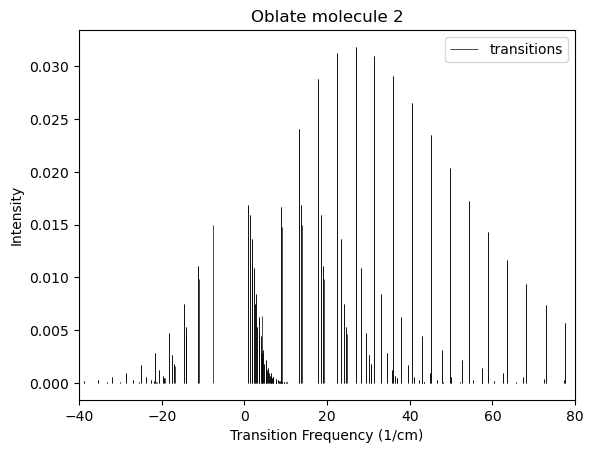

2.16
0.10600000000000001


In [14]:
C = 0.1
B = 2
T = 23
delta_B = 0.08
delta_C = 0.06
Q_branch = True

sim = Simulated_Contour(A=B, B=B, C=C, Delta_A=B*delta_B, Delta_B=B*delta_B, Delta_C=C*delta_C, Trot=T,
                        Jlimit=200, Target='Oblate molecule 2', lambda0=6614, Q_Branch=Q_branch, xlim = (-40, 80))

print(B + B*delta_B)
print(C + C*delta_C)

With PGOPHER we obtain:

<img src="https://i.imgur.com/ZxthwoX.jpg" alt="Drawing" style="width: 600px;"/>

# Oblate molecule 3 whit delta = 0

Symmetry Type:  symmetric_oblate
Symmetry Type:  symmetric_oblate


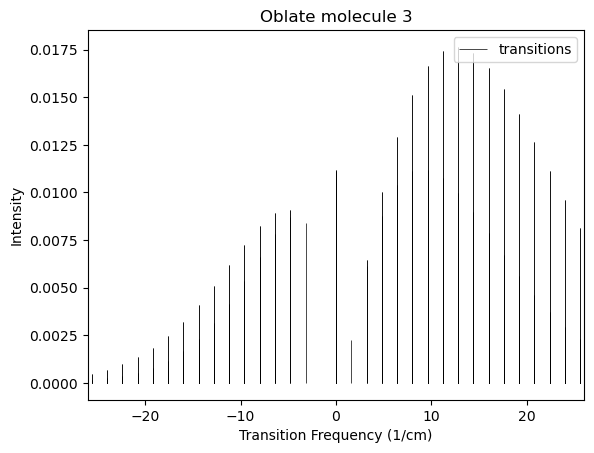

0.8
0.1


In [15]:
C = 0.1
B = 0.8
T = 23
delta_B = 0.0
delta_C = 0.0
Q_branch = True

sim = Simulated_Contour(A=B, B=B, C=C, Delta_A=B*delta_B, Delta_B=B*delta_B, Delta_C=C*delta_C, Trot=T,
                        Jlimit=100, Target='Oblate molecule 3', lambda0=6614, Q_Branch=Q_branch, xlim = (-26, 26))

print(B + B*delta_B)
print(C + C*delta_C)

With PGOPHER we obtain:

<img src="https://i.imgur.com/xDqLkN5.jpg" alt="Drawing" style="width: 600px;"/>